# <div align='center'>BUAN 6341 Project 1 Classification Task Report<div>
## <div align='center'>Christopher Perry &  Vishal Haresh Jiandani<div>
## <div align='center'>10/08/2020<div>

## Classification Task
The task at hand is to develop a model that is able to achieve high classification accuracy when predicting a mushroom sample's edibility.

## On The Data
The data set utilized was made available through Kaggle by UCI Machine Learning. The data set consists of information pertaining to hypothetical samples from 23 species of gilled mushrooms. Paramount to the classification task and made available in this data set is the characteristic, 'class.' This characteristic describes each mushroom's edibility. In other words, mushrooms are classified as edible and safe to consume or poisonous and harmful to one's health. Various other characteristics are included to further describe each mushroom sample (i.e. color, number of rings, odor, etc.). The complete list of mushroom characteristics considered in this report and a brief description of each can be found below.

Feature: Class\
Description: A mushroom edibility in terms of edible or poisonous.\
Applicable Values: P, E

Feature: Cap Shape\
Description: The shape of the mushroom's cap.\
Applicable Values: Bell (b), conical (c), convex (x), flat (f), knobbed (k), sunken (s)

Feature: Cap Surface\
Description: The texture of the mushroom's cap surface.\
Applicable Values: Fibrous (f), grooves (g), scaly (y), smooth (s)

Feature: Cap Color\
Description: The color of the mushroom's cap.\
Applicable Values: Brown (n), buff (b), cinnamon (c), gray (g), green (r), pink (p), purple (u), red (e), white (w), yellow (y)

Feature: Bruises\
Description: Presence of bruises.\
Applicable Values: True (t), false (f)

Feature: Odor\
Description: The odor of the mushroom.\
Applicable Values: Almond (a), anise (l), creosote (c), fishy (y), foul (f), musty (m), none (n),pungent (p), spicy (s)

Feature: Gill Attachment\
Description: The mushroom's gill attachment type.\
Applicable Values: Attached (a), descending (d), free(f), notched (n)

Feature: Gill Spacing\
Description: The mushroom's gill spacing.\
Applicable Values: Close (c), crowded (w), distant (d)

Feature: Gill Size\
Description: The mushroom's gill size.\
Applicable Values: Broad (b), narrow (n)

Feature: Gill Color\
Description: The mushroom's gill color.\
Applicable Values: Black (k), brown (n), buff (b), chocolate (h), gray (g), green (r), orange (o), pink (p), purple (u), red (e), white (w), yellow (y)

Feature: Stalk Shape\
Description: The mushroom's stalk shape.\
Applicable Values: Enlarging (e), tapering (t)

Feature: Stalk Root\
Description: The mushroom's stalk root type.\
Applicable Values: Bulbous (b), club (c), cup (u), equal (e), rhizomorphs (z), rooted (r), missing (?)

Feature: Stalk Surface Above Ring\
Description: The mushroom's stalk texture above the ring.\
Applicable Values: Fibrous (f), scaly (y), silky (k), smooth (s)

Feature: Stalk Surface Below Ring\
Description: The mushroom's stalk texture below the ring.\
Applicable Values: Fibrous (f), scaly (y), silky (k), smooth (s)

Feature: Stalk Color Above Ring\
Description: The mushroom's stalk color above the ring.\
Applicable Values: Brown (n), buff (b), cinnamon (c), gray (g), orange (o), pink (p), red (e), white (w), yellow (y)

Feature: Stalk Color Below Ring\
Description: The mushroom's stalk color above the ring.\
Applicable Values: Brown (n), buff (b), cinnamon (c), gray (g), orange (o), pink (p), red (e), white (w), yellow (y)

Feature: Veil Type\
Description: The mushroom's veil type.\
Applicable Values: Partial (p), universal (u)

Feature: Veil Color\
Description: The mushroom's viel color.\
Applicable Values: Brown (n), orange (o), white (w), yellow (y)

Feature: Ring Number\
Description: The number of rings present.\
Applicable Values: None (n), one (o), two (t)

Feature: Ring Type\
Description: The type of rings present.\
Applicable Values: Cobwebby (c), evanescent (e), flaring (f), large (l), None (n), pendant (p), sheathing (s), zone (z)

Feature: Spore Print Color\
Description: The mushroom's spore print color.\
Applicable Values: Black (k), brown (n), buff (b), chocolate (h), green (r), orange (o), purple (u), white (w), yellow (y)

Feature: Population\
Description: The mushroom species' presence.\
Applicable Values: Abundant (a), clustered (c), numerous (n), scattered (s), several (v), solitary (y)

Feature: Habitat\
Description: The mushroom's habitat and where it can be found.\
Applicable Values: Grasses (g), leaves (l), meadows (m), paths (p), urban (u), waste (w), woods (d)

### Exploratory Data Analysis
For the most part, exploratory data analysis consisted of seeking insight into possible classification rules inherent to the data set used. Mushroom characteristics that can be used to indicate, with 100% accuracy, whether a mushroom is edible or poisonous on their own and without any supplemental information (other characteristics) warrant removal as this would cause any model to learn to classify a mushroom's edibility with simple rules based on those features.

In [1]:
# Import packages used across all tasks.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import warnings
import sklearn.exceptions

In [2]:
# Read in mushroom data file for subsequent use.
mushroom_df = pd.read_csv('mushrooms.csv', na_values=['?'])
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

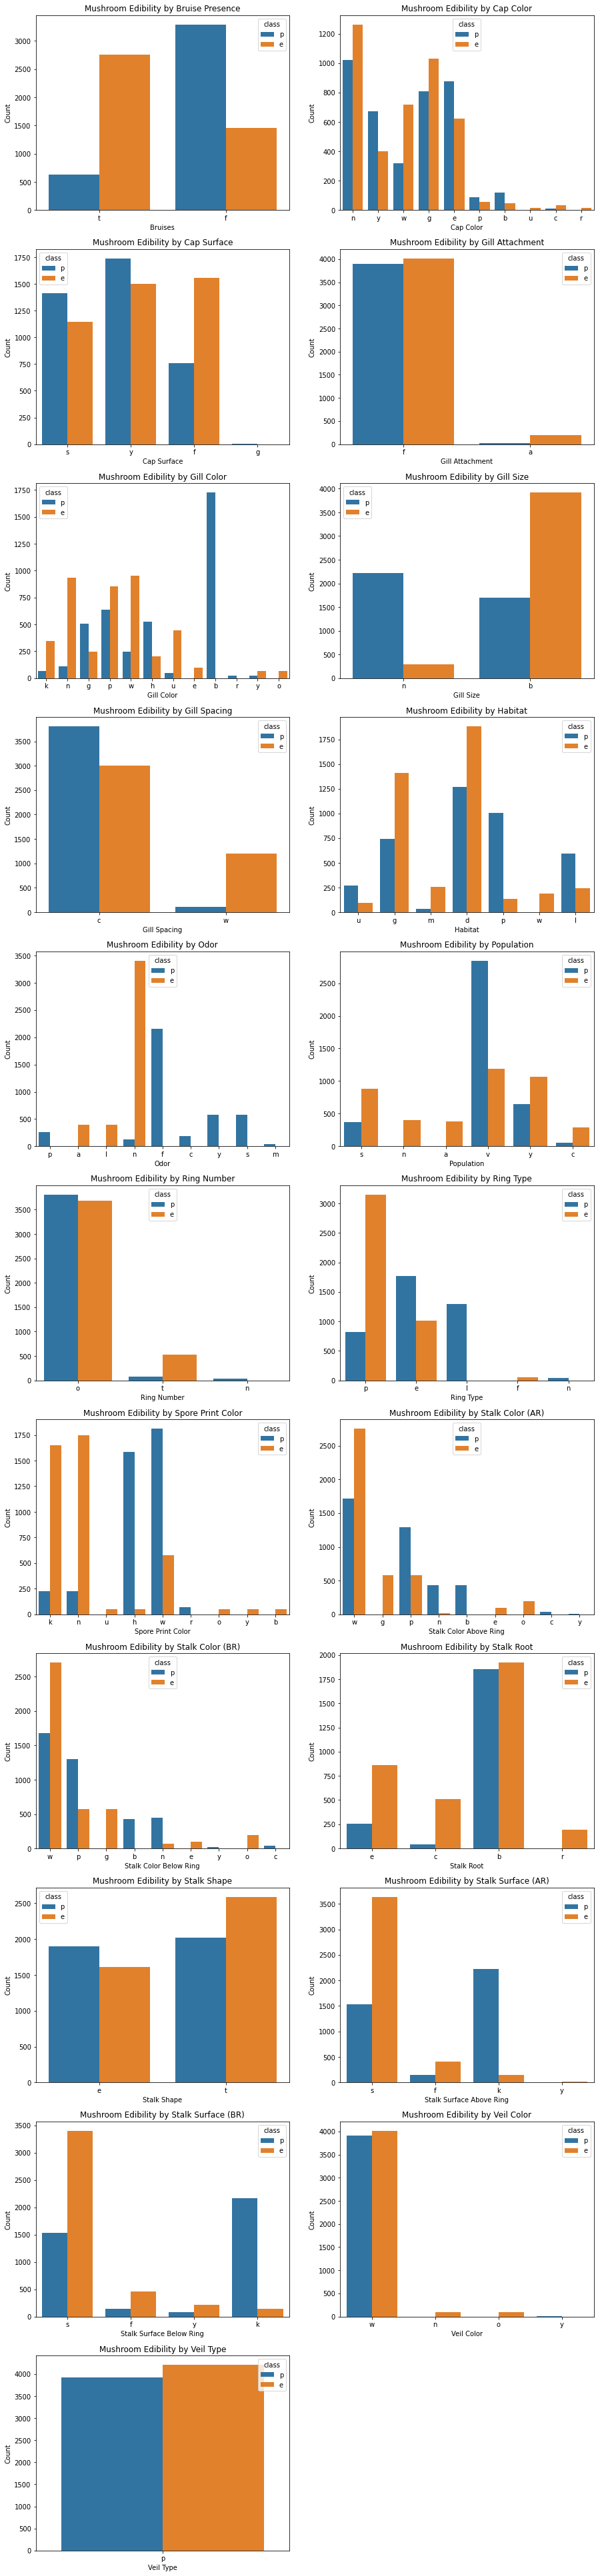

In [3]:
# Create a dataframe using a copy of the mushroom dataset for EDA purposes.
eda_df = mushroom_df.copy()
# Replace hyphens in column names with underscores for ease of access.
for column in eda_df.columns:
    if column.find('-') >= 0:
        eda_df.rename(columns={column: column.replace('-', '_')}, inplace=True)

# Create 11 by 2 plotting area to explore mushroom edibility by each feature.
fig, ax = plt.subplots(11, 2, figsize=(15, 70))

viz_bruises = sb.countplot(x='bruises', hue='class', data=eda_df, ax=ax[0, 0])
viz_bruises.set(xlabel='Bruises', ylabel='Count', title='Mushroom Edibility by Bruise Presence')

viz_cap_color = sb.countplot(x='cap_color', hue='class', data=eda_df, ax=ax[0, 1])
viz_cap_color.set(xlabel='Cap Color', ylabel='Count', title='Mushroom Edibility by Cap Color')

viz_cap_surface = sb.countplot(x='cap_surface', hue='class', data=eda_df, ax=ax[1, 0])
viz_cap_surface.set(xlabel='Cap Surface', ylabel='Count', title='Mushroom Edibility by Cap Surface')

viz_gill_attachment = sb.countplot(x='gill_attachment', hue='class', data=eda_df, ax=ax[1, 1])
viz_gill_attachment.set(xlabel='Gill Attachment', ylabel='Count', title='Mushroom Edibility by Gill Attachment')

viz_gill_color = sb.countplot(x='gill_color', hue='class', data=eda_df, ax=ax[2, 0])
viz_gill_color.set(xlabel='Gill Color', ylabel='Count', title='Mushroom Edibility by Gill Color')

viz_gill_size = sb.countplot(x='gill_size', hue='class', data=eda_df, ax=ax[2, 1])
viz_gill_size.set(xlabel='Gill Size', ylabel='Count', title='Mushroom Edibility by Gill Size')

viz_gill_spacing = sb.countplot(x='gill_spacing', hue='class', data=eda_df, ax=ax[3, 0])
viz_gill_spacing.set(xlabel='Gill Spacing', ylabel='Count', title='Mushroom Edibility by Gill Spacing')

viz_habitat = sb.countplot(x='habitat', hue='class', data=eda_df, ax=ax[3, 1])
viz_habitat.set(xlabel='Habitat', ylabel='Count', title='Mushroom Edibility by Habitat')

viz_odor = sb.countplot(x='odor', hue='class', data=eda_df, ax=ax[4, 0])
viz_odor.set(xlabel='Odor', ylabel='Count', title='Mushroom Edibility by Odor')

viz_population = sb.countplot(x='population', hue='class', data=eda_df, ax=ax[4, 1])
viz_population.set(xlabel='Population', ylabel='Count', title='Mushroom Edibility by Population')

viz_ring_number = sb.countplot(x='ring_number', hue='class', data=eda_df, ax=ax[5, 0])
viz_ring_number.set(xlabel='Ring Number', ylabel='Count', title='Mushroom Edibility by Ring Number')

viz_ring_type = sb.countplot(x='ring_type', hue='class', data=eda_df, ax=ax[5, 1])
viz_ring_type.set(xlabel='Ring Type', ylabel='Count', title='Mushroom Edibility by Ring Type')

viz_spore_print_color = sb.countplot(x='spore_print_color', hue='class', data=eda_df, ax=ax[6, 0])
viz_spore_print_color.set(xlabel='Spore Print Color', ylabel='Count', title='Mushroom Edibility by Spore Print Color')

viz_stalk_color_ar = sb.countplot(x='stalk_color_above_ring', hue='class', data=eda_df, ax=ax[6, 1])
viz_stalk_color_ar.set(xlabel='Stalk Color Above Ring', ylabel='Count', title='Mushroom Edibility by Stalk Color (AR)')

viz_stalk_color_br = sb.countplot(x='stalk_color_below_ring', hue='class', data=eda_df, ax=ax[7, 0])
viz_stalk_color_br.set(xlabel='Stalk Color Below Ring', ylabel='Count', title='Mushroom Edibility by Stalk Color (BR)')

viz_stalk_root = sb.countplot(x='stalk_root', hue='class', data=eda_df, ax=ax[7, 1])
viz_stalk_root.set(xlabel='Stalk Root', ylabel='Count', title='Mushroom Edibility by Stalk Root')

viz_stalk_shape = sb.countplot(x='stalk_shape', hue='class', data=eda_df, ax=ax[8, 0])
viz_stalk_shape.set(xlabel='Stalk Shape', ylabel='Count', title='Mushroom Edibility by Stalk Shape')

viz_stalk_surface_ar = sb.countplot(x='stalk_surface_above_ring', hue='class', data=eda_df, ax=ax[8, 1])
viz_stalk_surface_ar.set(xlabel='Stalk Surface Above Ring', ylabel='Count', title='Mushroom Edibility by Stalk Surface (AR)')

viz_stalk_surface_br = sb.countplot(x='stalk_surface_below_ring', hue='class', data=eda_df, ax=ax[9, 0])
viz_stalk_surface_br.set(xlabel='Stalk Surface Below Ring', ylabel='Count', title='Mushroom Edibility by Stalk Surface (BR)')

viz_veil_color = sb.countplot(x='veil_color', hue='class', data=eda_df, ax=ax[9, 1])
viz_veil_color.set(xlabel='Veil Color', ylabel='Count', title='Mushroom Edibility by Veil Color')

viz_veil_type = sb.countplot(x='veil_type', hue='class', data=eda_df, ax=ax[10, 0])
viz_veil_type.set(xlabel='Veil Type', ylabel='Count', title='Mushroom Edibility by Veil Type')

# Remove axis from blank plot.
ax[-1,-1].axis('off')

# Display plots.
plt.show()

## Data Preparation & Pre-processing
Prior to conducting analyses, data preparation and pre-processing were required. The following subsections describe the actions taken to ensure the data was 'fit' for analyses and to meet project requirements.

### Completeness Updates
The original data set made available through Kaggle is complete, containing zero missing value across each observation. For each feature, excluding class and stalk root, 20 values were rendered missing, resulting in 420 newly missing values or about 5.2% of all values in the data set (420/8124). Subsequently, all missing values were imputed using the 'most frequent' strategy within feature. For example, if 70% of the observations in the data set describe a mushroom with a cap color of brown, then the missing cap color values in the data set would be set to brown as well.

### Data Transformations
In order to use the data set for classification purposes, each feature was label encoded or a one-hot-vector was created. In the instances where a binary relationship could exist, label encoding was used. The original categorical values were mapped to the numerical values of 0 and 1 with the most predominant value within each feature across the entire data set being mapped to 1. Otherwise, the data set was widened using one-hot-vectors with a length equal to the number of unique possible values within each feature across the entire data set. For example, if the original feature contained five possible values, then the data set would contain a new feature for each possible value and the original feature would be removed from the data set, widening the data set by the number of possible values within the original feature less one. The presence of a 1 for each of these newly created features indicates the applicability of a feature for a given observation.

In [4]:
# Pre-processing tasks.
# Replace hyphens in column names with underscores for ease of access.
for column in mushroom_df.columns:
    if column.find('-') >= 0:
        mushroom_df.rename(columns={column: column.replace('-', '_')}, inplace=True)

# Observe metadata on mushroom dataframe before manipulating the dataframe to have ~5% of its values missing.
#print('Mushroom dataframe metadata:')
#mushroom_df.info()

# Randomly replace 20 values in each column with NAN except stalk_root as there are already over 2k missing values.
for column in mushroom_df.columns[1:23]:
    if column != 'stalk_root':
        mushroom_df[column] = mushroom_df[column].sample(8104, random_state=42)
    else:
        continue

# Observe metadata on mushroom dataframe after manipulating the dataframe to have ~5% of its values missing.
#print('Updated mushroom dataframe metadata:')
#mushroom_df.info()

# Impute newly missing values using the 'most frequent' strategy within each feature.
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mushroom_df = pd.DataFrame(imp.fit_transform(mushroom_df), columns=mushroom_df.columns)

# Map class column the values of 1 (e) and 0 (p) as edible mushrooms are predominant in the dataset.
mushroom_df['class'] = mushroom_df['class'].map({'p': 0, 'e': 1})

# Map bruises column with the values of 1 (f) and 0 (t) as non-bruised mushrooms are predominant in the dataset.
mushroom_df['bruises'] = mushroom_df['bruises'].map({'t': 0, 'f': 1})

# Map ring_number column with the values of 0 (n), 1 (o), and 2 (t).
mushroom_df['ring_number'] = mushroom_df['ring_number'].map({'n': 0, 'o': 1, 't': 2})

# Map gill_size column with the values of 1 (b) and 0 (n) as broad gill-sized mushrooms are predominant in the dataset.
mushroom_df['gill_size'] = mushroom_df['gill_size'].map({'n': 0, 'b': 1})

# Map stalk_shape column with the values of 1 (t) and 0 (e) as enlarging stalk shaped mushrooms are predominant in the dataset.
mushroom_df['stalk_shape'] = mushroom_df['stalk_shape'].map({'e': 0, 't': 1})

# Map veil_type column with the values of 1 (p) and 0 (u) as all mushrooms in the dataset are of partial veil type.
mushroom_df['veil_type'] = mushroom_df['veil_type'].map({'u': 0, 'p': 1})

# Map gill_attachment column with the values of 1 (f) and 0 (a) as free-gilled mushrooms are predominant in the dataset.
mushroom_df['gill_attachment'] = mushroom_df['gill_attachment'].map({'a': 0, 'f': 1})

# Map gill_spacing column with the values of 1 (c) and 0 (w) as close gill spacing is predominant in the dataset.
mushroom_df['gill_spacing'] = mushroom_df['gill_spacing'].map({'w': 0, 'c': 1})

# Create a list that contains the columns in the mushroom dataset that do not require dummy column generation.
# Use the list to remove these values from a larger list that contains the entire set of columns.
dummy_ex_cols = ['class', 'bruises', 'ring_number', 'gill_size', 
                 'stalk_shape', 'veil_type', 'gill_attachment', 'gill_spacing']
dummy_cols = list(set(mushroom_df.columns) - set(dummy_ex_cols))

# The dataset is significantly widened by creating dummy columns for 20 of the 23 original features.
mushroom_df = pd.get_dummies(mushroom_df, columns=dummy_cols, dtype=float)

# Review widened dataset's metadata to ensure that all columns, aside from the target, are of float data type.
#mushroom_df.info(verbose=True)

# Drop duplicates (16 records dropped, 8124 -> 8108) and ensure they are dropped prior to splitting data.
mushroom_df.drop_duplicates(inplace=True)
mushroom_df.duplicated().value_counts()

#data_leaks new proposed strategy
mushroom_df.groupby(['class','gill_color_b']).count()
mushroom_df['gill_color_b'].loc[(mushroom_df['gill_color_b'] == 1) & (mushroom_df['class'] == 1)].count()/ mushroom_df['gill_color_b'].loc[(mushroom_df['gill_color_b'] == 1)].count()# & (mushroom_df['class'] == 0)].count()

# Check for data leakage after pre-processing steps.
data_leaks = {}
for column in mushroom_df:
    if column != 'class':
        p = mushroom_df[column].loc[(mushroom_df[column] == 1) & (mushroom_df['class'] == 0)].count()
        e = mushroom_df[column].loc[(mushroom_df[column] == 1) & (mushroom_df['class'] == 1)].count()
        if (p / mushroom_df[column].loc[(mushroom_df[column] == 1)].count() < .30 or 
            e / mushroom_df[column].loc[(mushroom_df[column] == 1)].count() < .30):
            data_leaks[column] = [p, e]

# Drop columns from final dataframe where there is a significant imbalance within a feature.
mushroom_df.drop(columns=list(data_leaks.keys()), axis=1, inplace=True)

# Define feature dataframe and target series.
X = mushroom_df.drop(columns=['class'], axis=1)
y = mushroom_df['class']

# Peform initial split of data.
X_train_us, X_test_us, y_train, y_test = train_test_split(X, y, random_state=0)

# Scale data using MinMaxScaler.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_us)
X_test = scaler.transform(X_test_us)

## Model Evaluation Strategy
Ultimately, the purpose of the model is to determine the edibility of a given mushroom with the highest possible accuracy; however, the misclassification costs are very high and rather one-sided. The cost of misclassifying a poisonous mushroom as edible can be harmful to one's health while the cost of misclassifying an edible mushroom as poisonous simply results in a mushroom deemed undesirable for consumption. Therefore, candidates for the most optimal model were evaluated based on precision score where the goal is to not label a mushroom as edible when it is poisonous.

## Empirical Analysis

### Model Evaluation Strategy
Ultimately, the purpose of the model is to determine the edibility of a given mushroom with the highest possible accuracy; however, the misclassification costs are very high and rather one-sided. The cost of misclassifying a poisonous mushroom as edible can be harmful to one's health while the cost of misclassifying an edible mushroom as poisonous simply results in a mushroom deemed undesirable for consumption. Therefore, candidates for the most optimal model were evaluated based on precision score where the goal is to not label a mushroom as edible when it is poisonous.

### K-Nearest Neighbors
The first estimator considered in finding the optimal model for the classification task at hand was k-nearest neighbors. The search for the optimal KNN model consisted of adjusting hyperparameter, k (# of neighbors) for a maximum precision score. The best value for k was deemed to be 3.

The confusion matrix below indicates that the model chosen among candidate models is able to achieve the goal of minimizing instances where a poisonous mushroom is classified as edible (false positives) quite well. Only two out of the 2027 samples in the test data were misclassified as edible when they were actually poisonous. See output for additional information.

In [5]:
# KNN Classification Task
# Import KNN classifier package for subsequent use.
from sklearn.neighbors import KNeighborsClassifier

# Use grid search to build the best estimator, considering hyperparameter, k.
param_grid = {'n_neighbors': np.arange(3, 20, 2)}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='precision', return_train_score=True)
knn_grid.fit(X_train, y_train)
y_pred = knn_grid.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)

# Create dataframe to store the results of grid search.
knn_results = pd.DataFrame(knn_grid.cv_results_)

# Print summary.
print(f"The optimal estimator found using grid search is the model where hyperparameter, k, is equal to {knn_grid.best_params_['n_neighbors']}.")
print(f'The optimal estimator was chosen based on the highest mean test score ({knn_grid.best_score_}).\n')
print('Scores')
print(f'Train Precision Score: \t{knn_grid.score(X_train, y_train)}')
print(f'Train Accuracy Score: \t{accuracy_score(y_train, knn_grid.predict(X_train))}')
print(f'Test Precision Score: \t{knn_grid.score(X_test, y_test)}')
print(f'Test Accuracy Score: \t{accuracy_score(y_test, knn_grid.predict(X_test))}')
print()
print('See the confusion matrix below that highlights the classification accuracy of the model.\n')
print(pd.DataFrame(data=knn_cm, columns = ['Predicted P', 'Predicted E'], index=['Actual P', 'Actual E']))

The optimal estimator found using grid search is the model where hyperparameter, k, is equal to 3.
The optimal estimator was chosen based on the highest mean test score (0.9993630573248409).

Scores
Train Precision Score: 	0.9996806132226126
Train Accuracy Score: 	0.9991777668146686
Test Precision Score: 	0.998114985862394
Test Accuracy Score: 	0.9960532807104094

See the confusion matrix below that highlights the classification accuracy of the model.

          Predicted P  Predicted E
Actual P          960            2
Actual E            6         1059


### Logistic Regression
Candidate models were created in the search for the best model using logistic regression as the estimator. These models varied in hyperparameter value, C, and the regularization method utilized. Of the 12 candidate models created, the best model was found the utilize Lasso regularization with a C value of 10. High precision and accuracy were achieved with this 'best' model; however, 13 times more false positives were present compared to the 'best' model found among candidate KNN models.

The multi-line plots show that mean test and train scores peak when C is 10 and the regularization method utilized is Lasso. See output for additional information.

The optimal estimator found using grid search is the model where hyperparameter, C, is equal to 10 and the regularization method is l1 (Lasso). The optimal estimator was chosen based on the highest mean test score (0.9780226888532708).

Scores
Train Precision Score: 	0.979572294924992
Train Accuracy Score: 	0.978786383818451
Test Precision Score: 	0.9753787878787878
Test Accuracy Score: 	0.9699062654168722

See the confusion matrix below that highlights the classification accuracy of the model.

          Predicted P  Predicted E
Actual P          936           26
Actual E           35         1030

The multi-line plots below highlight the changes in mean train and test scores as C increases across both regularization methods, Lasso and Ridge.



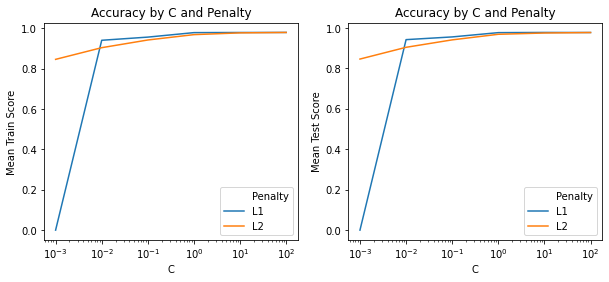

The table below contains the same data visualized above in the multi-line plots.


,Penalty,C Value,Mean Train Score,Mean Test Score,Difference
0,l1,0.001,0.000000,0.000000,0.000000
1,l2,0.001,0.846821,0.846370,0.000452
2,l1,0.01,0.941450,0.942418,-0.000968
3,l2,0.01,0.904730,0.904501,0.000229
4,l1,0.1,0.957159,0.955876,0.001283
5,l2,0.1,0.942861,0.941291,0.001570
6,l1,1,0.979387,0.977072,0.002315
7,l2,1,0.969423,0.968923,0.000499
8,l1,10,0.980052,0.978023,0.002030
9,l2,10,0.978158,0.975208,0.002950


In [6]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Use grid search to build the best estimator, considering hyperparameter, C, and regularization methods, L1 and L2.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
logreg = LogisticRegression(solver='liblinear')
logreg_grid = GridSearchCV(logreg, param_grid, cv=5, scoring='precision', return_train_score=True)
logreg_grid.fit(X_train, y_train)
y_pred = logreg_grid.predict(X_test)
logreg_cm = confusion_matrix(y_test, y_pred)

# Create dataframe to store the results of grid search.
logreg_results = pd.DataFrame(logreg_grid.cv_results_)

# Print summary.
print(f"The optimal estimator found using grid search is the model where hyperparameter, C, \
is equal to {logreg_grid.best_params_['C']} and the regularization method is \
{logreg_grid.best_params_['penalty']} (Lasso). The optimal estimator was chosen \
based on the highest mean test score ({logreg_grid.best_score_}).\n")
print('Scores')
print(f'Train Precision Score: \t{logreg_grid.score(X_train, y_train)}')
print(f'Train Accuracy Score: \t{accuracy_score(y_train, logreg_grid.predict(X_train))}')
print(f'Test Precision Score: \t{logreg_grid.score(X_test, y_test)}')
print(f'Test Accuracy Score: \t{accuracy_score(y_test, logreg_grid.predict(X_test))}')
print()
print('See the confusion matrix below that highlights the classification accuracy of the model.\n')
print(pd.DataFrame(data=logreg_cm, columns = ['Predicted P', 'Predicted E'], index=['Actual P', 'Actual E']))
print()
print('The multi-line plots below highlight the changes in mean train and test scores as C increases across both regularization \
methods, Lasso and Ridge.')
print()

# Create multi-line plot to observe the change in accuracy as C increases across both regularization methods, l1 and l2.
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
viz_logreg_train = sb.lineplot(data=logreg_results, x='param_C', y='mean_train_score', hue='param_penalty', ax=ax[0])
viz_logreg_train.set(xscale='log', xlabel='C', ylabel='Mean Train Score', title='Accuracy by C and Penalty')
legend = viz_logreg_train.legend()
legend.get_texts()[0].set_text('Penalty')
legend.get_texts()[1].set_text('L1')
legend.get_texts()[2].set_text('L2')

viz_logreg_test = sb.lineplot(data=logreg_results, x='param_C', y='mean_test_score', hue='param_penalty', ax=ax[1])
viz_logreg_test.set(xscale='log', xlabel='C', ylabel='Mean Test Score', title='Accuracy by C and Penalty')
legend = viz_logreg_test.legend()
legend.get_texts()[0].set_text('Penalty')
legend.get_texts()[1].set_text('L1')
legend.get_texts()[2].set_text('L2')

# Display multi-line plot.
plt.show()

# Create dataframe for ease of use in comparing mean train and test scores as the values are very close to each other.
print('The table below contains the same data visualized above in the multi-line plots.')
logreg_ezview = pd.concat([pd.DataFrame(logreg_results[['param_penalty', 'param_C', 'mean_train_score', 'mean_test_score']],), 
                    pd.DataFrame(logreg_results['mean_train_score']-logreg_results['mean_test_score'])],
                   axis=1)
logreg_ezview.rename(columns={'param_penalty': 'Penalty', 'param_C': 'C Value', 
                              'mean_train_score': 'Mean Train Score', 'mean_test_score': 'Mean Test Score', 
                              0: 'Difference'}, inplace=True)
logreg_ezview

### Linear Support Vector Machine
Candidate models were created in the search for the best model using linear support vector machine as the estimator. These models varied in hyperparameter value, C, and the regularization method utilized. Of the 12 candidate models created, the best model was found the utilize Lasso regularization with a C value of 0.1. High precision and accuracy were achieved with this 'best' model; however, 1.5 times more false positives were present compared to the 'best' model found among candidate Logistic Regression models and over 19 times more in the 'best' KNN model.

The multi-line plots show that mean test and train scores peak when C is 0.1 and the regularization method utilized is Lasso. See output for additional information.

The optimal estimator found using grid search is the model where hyperparameter, C, is equal to 0.1 and the regularization method is l1 (Lasso). The optimal estimator was chosen based on the highest mean test score (0.9673966574131846).

Scores
Train Precision Score: 	0.9670990192976906
Train Accuracy Score: 	0.9702351586910047
Test Precision Score: 	0.9635514018691589
Test Accuracy Score: 	0.9639861864824865

See the confusion matrix below that highlights the classification accuracy of the model.

          Predicted P  Predicted E
Actual P          923           39
Actual E           34         1031

The multi-line plots below highlight the changes in mean train and test scores as C increases across both regularization methods, Lasso and Ridge.



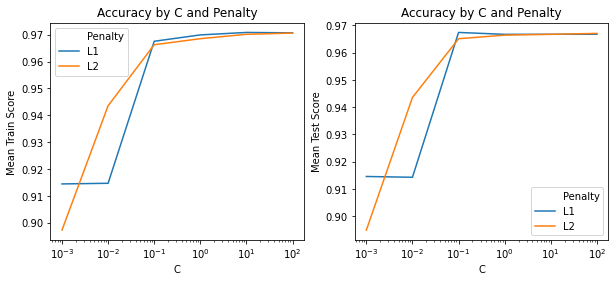

,Penalty,C Value,Mean Train Score,Mean Test Score,Difference
0,l1,0.001,0.914478,0.914605,-1.263455e-04
1,l2,0.001,0.897291,0.894947,2.343564e-03
2,l1,0.01,0.914721,0.914315,4.055617e-04
3,l2,0.01,0.943572,0.943572,5.494914e-07
4,l1,0.1,0.967565,0.967397,1.683713e-04
5,l2,0.1,0.966278,0.965094,1.183473e-03
6,l1,1,0.969931,0.966703,3.228509e-03
7,l2,1,0.968523,0.966408,2.115012e-03
8,l1,10,0.970848,0.966727,4.120824e-03
9,l2,10,0.970156,0.966717,3.438923e-03


In [7]:
# Linear Support Vector Machine
from sklearn.svm import LinearSVC

# Use grid search to build the best estimator, considering hyperparameter, C, and regularization methods, L1 and L2.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
linsvc = LinearSVC(dual=False, max_iter=100000)
linsvc_grid = GridSearchCV(linsvc, param_grid, cv=5, scoring='precision', return_train_score=True)
linsvc_grid.fit(X_train, y_train)
y_pred = linsvc_grid.predict(X_test)
linsvc_cm = confusion_matrix(y_test, y_pred)

# Create dataframe to store the results of grid search.
linsvc_results = pd.DataFrame(linsvc_grid.cv_results_)

# Print summary.
print(f"The optimal estimator found using grid search is the model where hyperparameter, C, \
is equal to {linsvc_grid.best_params_['C']} and the regularization method is \
{linsvc_grid.best_params_['penalty']} (Lasso). The optimal estimator was chosen \
based on the highest mean test score ({linsvc_grid.best_score_}).\n")
print('Scores')
print(f'Train Precision Score: \t{linsvc_grid.score(X_train, y_train)}')
print(f'Train Accuracy Score: \t{accuracy_score(y_train, linsvc_grid.predict(X_train))}')
print(f'Test Precision Score: \t{linsvc_grid.score(X_test, y_test)}')
print(f'Test Accuracy Score: \t{accuracy_score(y_test, linsvc_grid.predict(X_test))}')

print()
print('See the confusion matrix below that highlights the classification accuracy of the model.\n')
print(pd.DataFrame(data=linsvc_cm, columns = ['Predicted P', 'Predicted E'], index=['Actual P', 'Actual E']))
print()
print('The multi-line plots below highlight the changes in mean train and test scores as C increases across both \
regularization methods, Lasso and Ridge.')
print()

# Create multi-line plot to observe the change in accuracy as C increases across both regularization methods, l1 and l2.
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
viz_linsvc_train = sb.lineplot(data=linsvc_results, x='param_C', y='mean_train_score', hue='param_penalty', ax=ax[0])
viz_linsvc_train.set(xscale='log', xlabel='C', ylabel='Mean Train Score', title='Accuracy by C and Penalty')
legend = viz_linsvc_train.legend()
legend.get_texts()[0].set_text('Penalty')
legend.get_texts()[1].set_text('L1')
legend.get_texts()[2].set_text('L2')

viz_linsvc_test = sb.lineplot(data=linsvc_results, x='param_C', y='mean_test_score', hue='param_penalty', ax=ax[1])
viz_linsvc_test.set(xscale='log', xlabel='C', ylabel='Mean Test Score', title='Accuracy by C and Penalty')
legend = viz_linsvc_test.legend()
legend.get_texts()[0].set_text('Penalty')
legend.get_texts()[1].set_text('L1')
legend.get_texts()[2].set_text('L2')

# Display multi-line plot.
plt.show()

# Create dataframe for ease of use in comparing mean train and test scores as the values are very close to each other.
linsvc_ezview = pd.concat([pd.DataFrame(linsvc_results[['param_penalty', 'param_C', 'mean_train_score', 'mean_test_score']],), 
                    pd.DataFrame(linsvc_results['mean_train_score']-linsvc_results['mean_test_score'])],
                   axis=1)
linsvc_ezview.rename(columns={'param_penalty': 'Penalty', 'param_C': 'C Value', 
                              'mean_train_score': 'Mean Train Score', 'mean_test_score': 'Mean Test Score', 
                              0: 'Difference'}, inplace=True)
linsvc_ezview

### Kernelized Support Vector Machine (RBF, Linear, and Poly)
Multiple candidate models, varying in their hyperparameter values, C and gamma, and kernel type used in the algorithm, were considered using the kernelized support vector machine estimator. Of the 108 candidate models created, the best model was found the utilize hyperparameter values of 0.1 and 10 for C and gamma, respectively. The 'best' model used the RBF kernel to determine the decision boundary.

While this model doesn't achieve as high of accuracy score when compared to other models using different estimator types, it does achieve the overall goal of minimizing the number of false positives. Zero samples were incorrectly identified as edible when of class poisonous.

The optimal estimator found using grid search is the model where hyperparameter, C, is equal to 0.1 and gamma is 10 and the kernel is rbf. The optimal estimator was chosen based on the highest mean test score (1.0).

Scores
Train Precision Score: 	1.0
Train Accuracy Score: 	0.8950830455517185
Test Precision Score: 	1.0
Test Accuracy Score: 	0.8455846077947706

See the confusion matrix below that highlights the classification accuracy of the model.

          Predicted P  Predicted E
Actual P          962            0
Actual E          313          752

The heatmaps below highlight the changes in mean test scores as regularization parameter, C, and kernel coefficient, gamma, change for Poly, RBF, and Linear kernels.



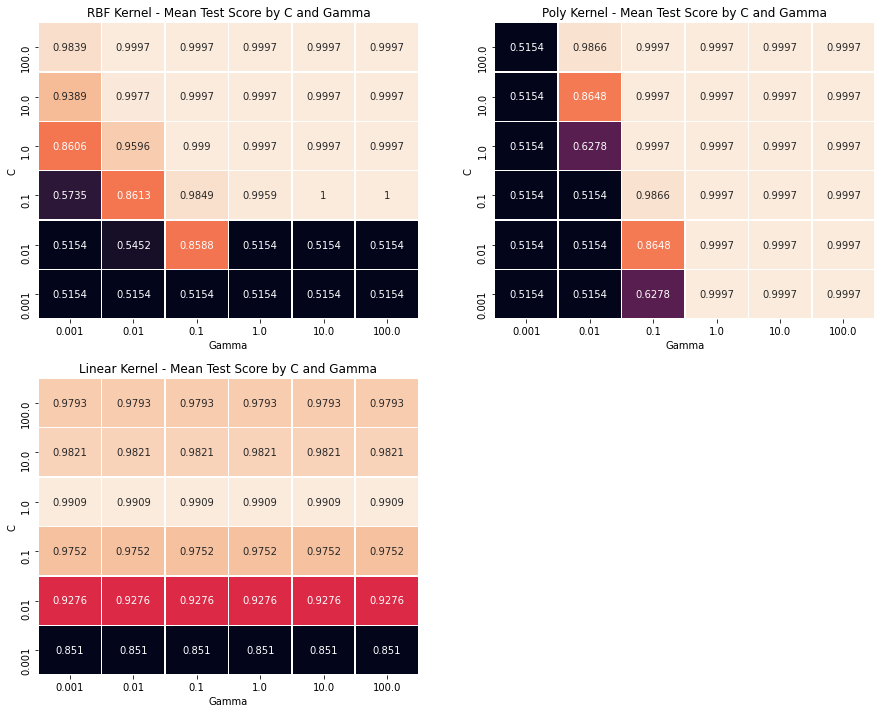

In [8]:
# Kernilzed Support Vector Machine (rbf, linear, and poly)
from sklearn.svm import SVC

# Use grid search to build the best estimator, considering hyperparameters, C (regularization parameter), and g (gamma).
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['rbf', 'linear', 'poly']}

ksvc = SVC()
ksvc_grid = GridSearchCV(ksvc, param_grid, cv=5, scoring='precision', return_train_score=True)
ksvc_grid.fit(X_train, y_train)
y_pred = ksvc_grid.predict(X_test)
ksvc_cm = confusion_matrix(y_test, y_pred)

# Create dataframe to store the results of grid search.
ksvc_results = pd.DataFrame(ksvc_grid.cv_results_)

# Print summary.
print(f"The optimal estimator found using grid search is the model where hyperparameter, C, \
is equal to {ksvc_grid.best_params_['C']} and gamma is {ksvc_grid.best_params_['gamma']} and \
the kernel is {ksvc_grid.best_params_['kernel']}. The optimal estimator was chosen based on the \
highest mean test score ({ksvc_grid.best_score_}).\n")
print('Scores')
print(f'Train Precision Score: \t{ksvc_grid.score(X_train, y_train)}')
print(f'Train Accuracy Score: \t{accuracy_score(y_train, ksvc_grid.predict(X_train))}')
print(f'Test Precision Score: \t{ksvc_grid.score(X_test, y_test)}')
print(f'Test Accuracy Score: \t{accuracy_score(y_test, ksvc_grid.predict(X_test))}')
print()
print('See the confusion matrix below that highlights the classification accuracy of the model.\n')
print(pd.DataFrame(data=ksvc_cm, columns = ['Predicted P', 'Predicted E'], index=['Actual P', 'Actual E']))
print()
print('The heatmaps below highlight the changes in mean test scores as regularization parameter, C, \
and kernel coefficient, gamma, change for Poly, RBF, and Linear kernels.')
print()

# Create 2 by 2 plotting area to explore mushroom edibility by each feature.
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

ksvc_rbf = ksvc_results[ksvc_results.param_kernel=='rbf'].pivot('param_C', 'param_gamma', 'mean_test_score').sort_values(by='param_C', ascending=False)
viz_ksvc_rbf = sb.heatmap(ksvc_rbf, linewidths=.5, annot=True, cbar=False, ax=ax[0, 0], fmt='.4g')
viz_ksvc_rbf.set(xlabel='Gamma', ylabel='C', title='RBF Kernel - Mean Test Score by C and Gamma')

ksvc_poly = ksvc_results[ksvc_results.param_kernel=='poly'].pivot('param_C', 'param_gamma', 'mean_test_score').sort_values(by='param_C', ascending=False)
viz_ksvc_poly = sb.heatmap(ksvc_poly, linewidths=.5, annot=True, cbar=False, ax=ax[0, 1], fmt='.4g')
viz_ksvc_poly.set(xlabel='Gamma', ylabel='C', title='Poly Kernel - Mean Test Score by C and Gamma')

ksvc_linear = ksvc_results[ksvc_results.param_kernel=='linear'].pivot('param_C', 'param_gamma', 'mean_test_score').sort_values(by='param_C', ascending=False)
viz_ksvc_linear = sb.heatmap(ksvc_linear, linewidths=.5, annot=True, cbar=False, ax=ax[1, 0], fmt='.4g')
viz_ksvc_linear.set(xlabel='Gamma', ylabel='C', title='Linear Kernel - Mean Test Score by C and Gamma')

# Remove axis from blank plot.
ax[-1,-1].axis('off')

# Display plots.
plt.show()

### Decision Tree Classifier
Multiple candidate models, varying in their hyperparameter values and split quality functions, were considered using the decision tree classifier estimator. 

As expected, for each 1 value increase in the maximum depth considered, the precision and accuracy increased. However, with each increase, the models became more complex and prone to overfitting. As such, the maximum depth considered to be optimal is where the number of false positives (i.e. poisonous mushrooms classified as edible) is driven to 0. The optimal maximum depth of the tree was determined to be 7.

Classification accuracy is secondary to this objective as the cost for misclassifying an edible mushroom as poisonous is lower than classifying a poisonous mushroom as edible. That being said, high accuracy was still able to be achieved.

Both split quality functions, gini and entropy, were considered for each value of the hyperparameter, maximum depth. The differences observed when using one or the other were negligible, but with entropy being slightly more favorable. See overlapping multi-line plots below and the table.

The optimal estimator found using grid search is the model where hyperparameter, max_depth, is equal to 7 and the function to measure the quality of the split is entropy. The optimal estimator was chosen based on the highest mean test score (0.99968).

Scores
Train Precision Score: 	1.0
Train Accuracy Score: 	0.9970399605328071
Test Precision Score: 	1.0
Test Accuracy Score: 	0.9965466206216083

See the confusion matrix below that highlights the classification accuracy of the model.

          Predicted P  Predicted E
Actual P          962            0
Actual E            7         1058

The multi-line plots below highlight the changes in mean train and test scores as the maximum depth of the tree increases across both split quality functions, gini and entropy.



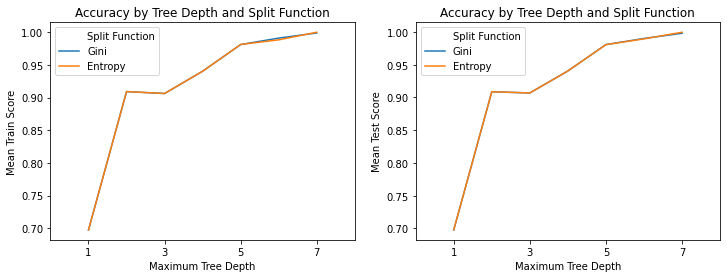


The table below contains the same data visualized above in the multi-line plots.


,Split Function,Max Depth,Mean Train Score,Mean Test Score,Difference
0,gini,1,0.697572,0.697697,-0.000125
1,gini,2,0.909198,0.908803,0.000394
2,gini,3,0.906268,0.906919,-0.000652
3,gini,4,0.940368,0.940542,-0.000175
4,gini,5,0.981205,0.980838,0.000367
5,gini,6,0.991030,0.990161,0.000869
6,gini,7,0.998887,0.998090,0.000797
7,entropy,1,0.697572,0.697697,-0.000125
8,entropy,2,0.909198,0.908803,0.000394
9,entropy,3,0.906268,0.906919,-0.000652


The bar chart below highlights the top 10 features by feature importance (gini importance).



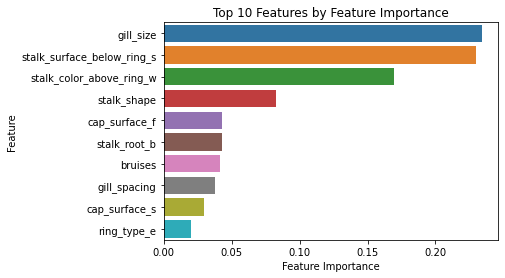


A graphical representation of the decision tree generated can be seen below.


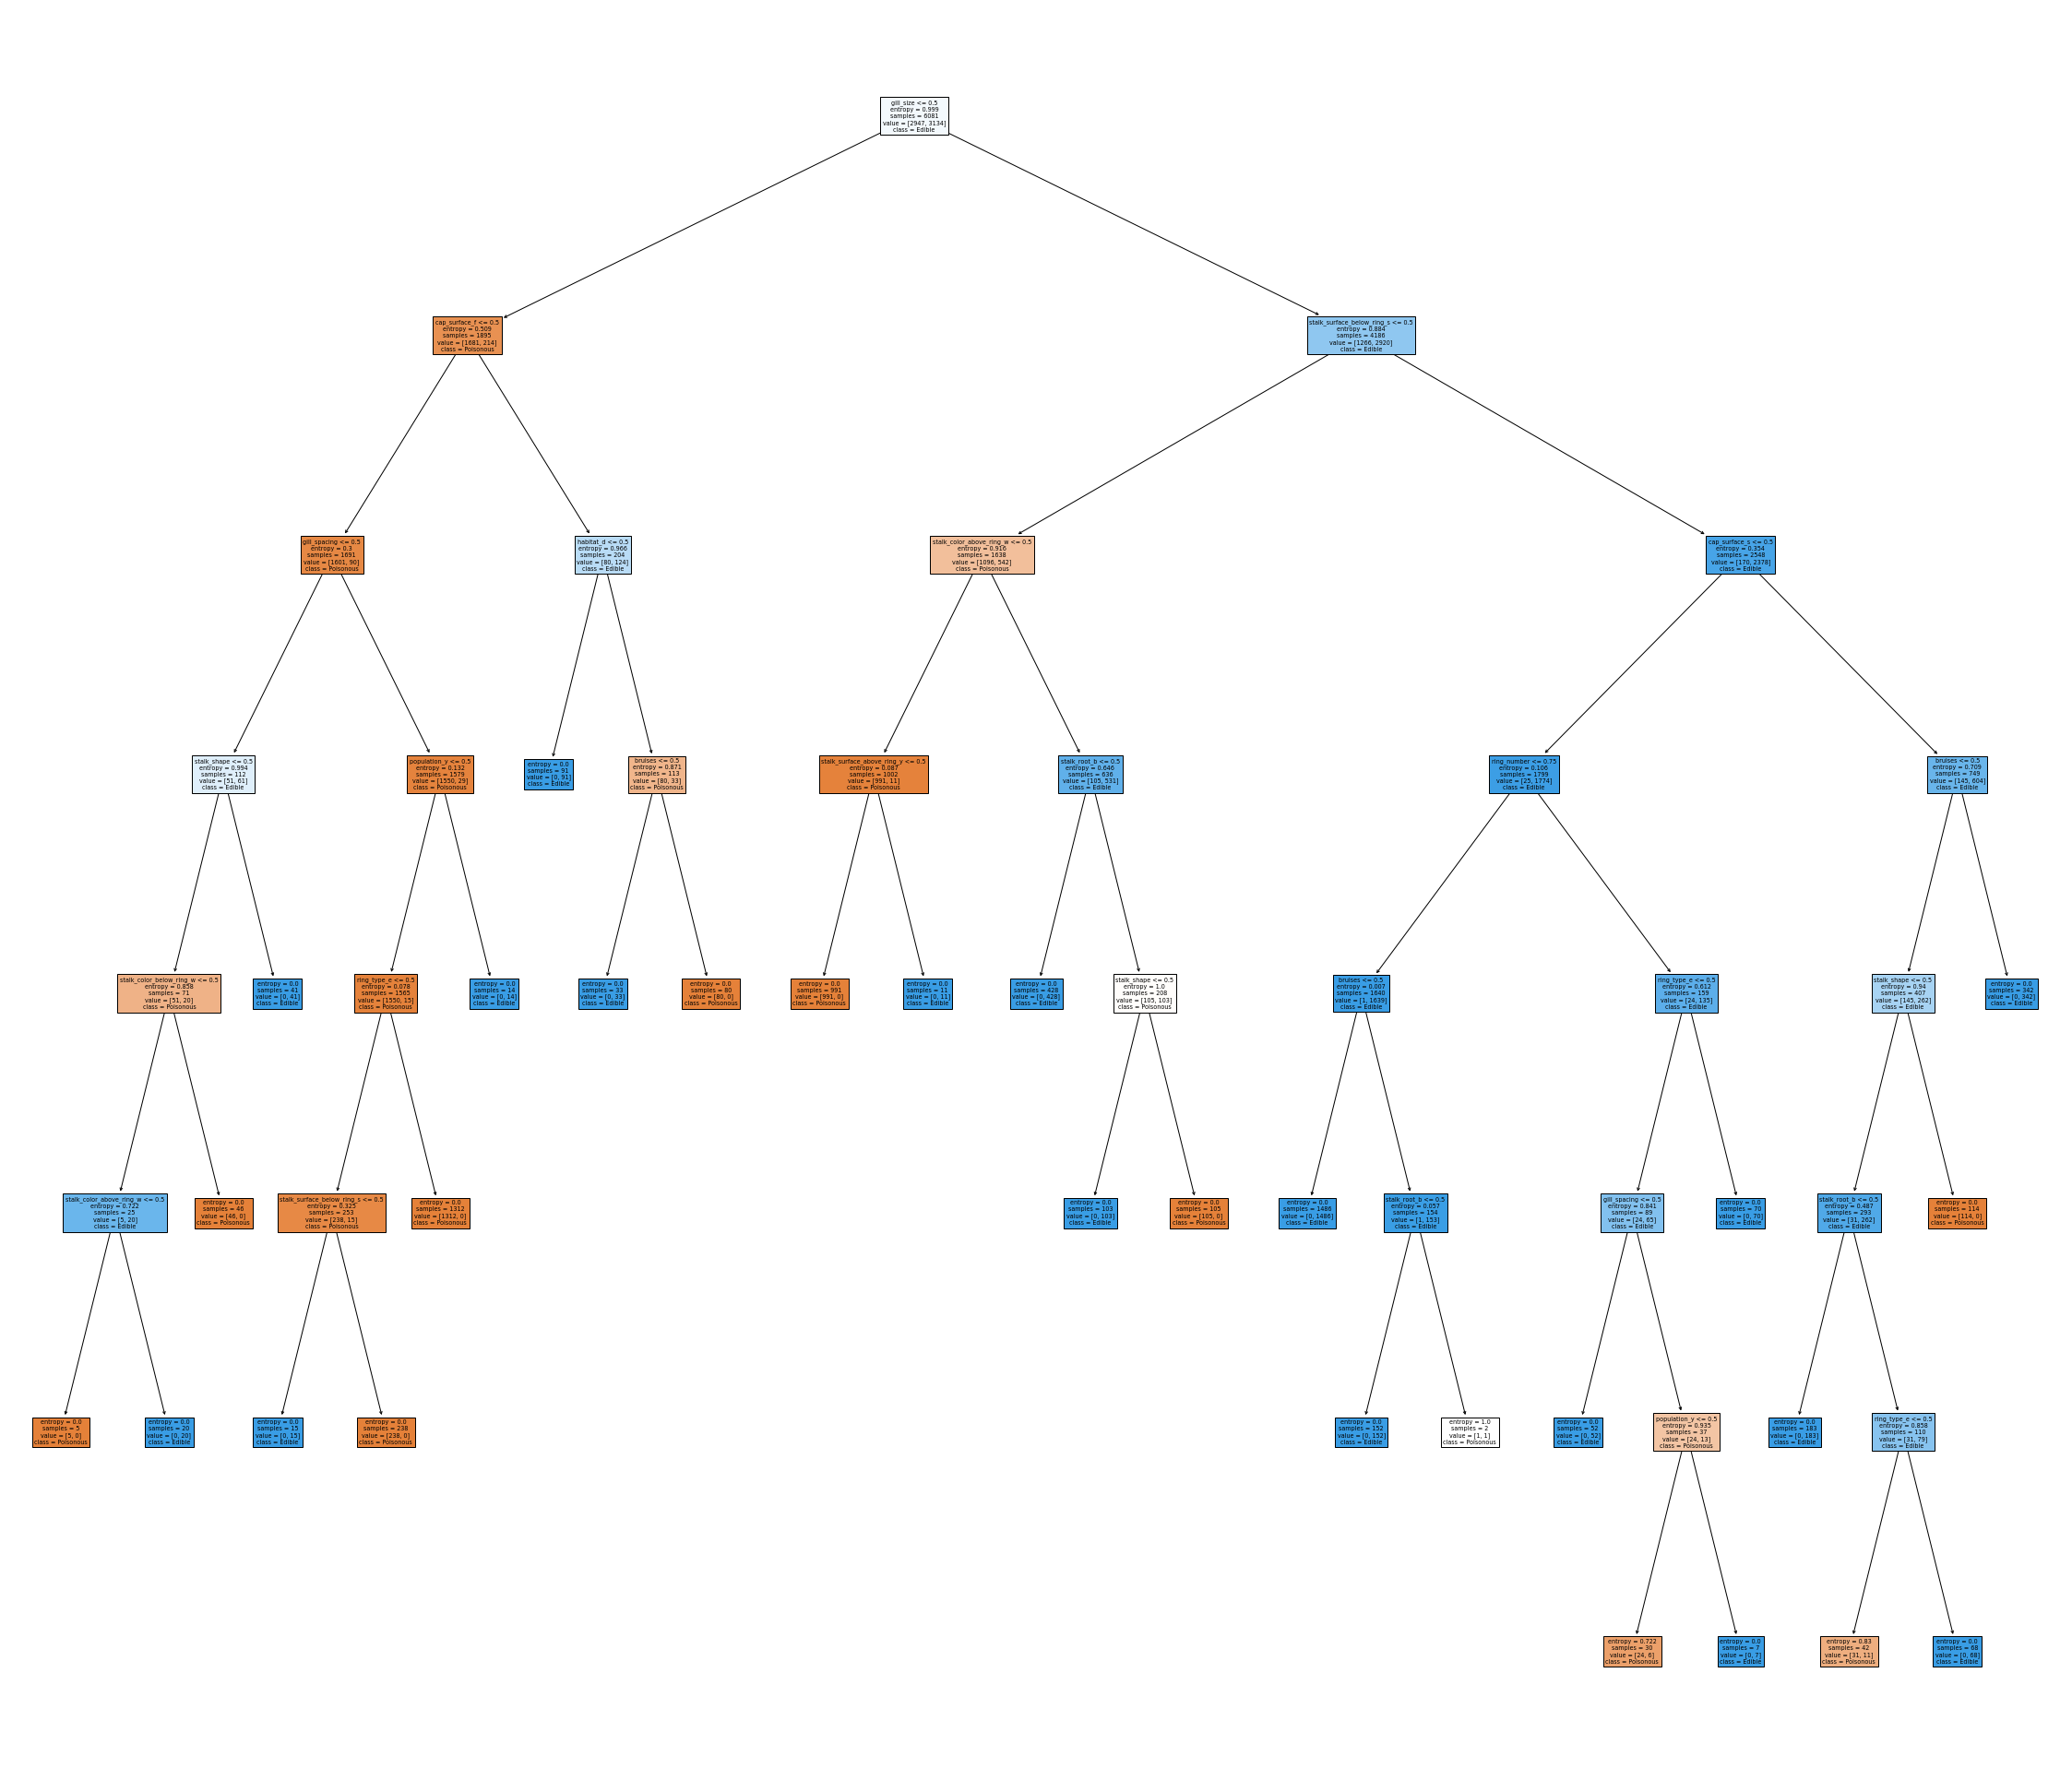

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions, category_scatter
from sklearn import tree

# Use grid search to build the best estimator, considering hyperparameter, max_depth, and split quality functions, gini and 
# entropy.
param_grid = {'max_depth': list(np.arange(1, 8)),
              'criterion': ['gini', 'entropy']}

dtree = DecisionTreeClassifier(random_state=0)
dtree_grid = GridSearchCV(dtree, param_grid, cv=5, scoring='precision', return_train_score=True)
dtree_grid.fit(X_train, y_train)
y_pred = dtree_grid.predict(X_test)
dtree_cm = confusion_matrix(y_test, y_pred)

# Create dataframe to store the results of grid search.
dtree_results = pd.DataFrame(dtree_grid.cv_results_)

# Print summary.
print(f"The optimal estimator found using grid search is the model where hyperparameter, max_depth, \
is equal to {dtree_grid.best_params_['max_depth']} and the function to measure the quality of the split \
is {dtree_grid.best_params_['criterion']}. The optimal estimator was chosen \
based on the highest mean test score ({dtree_grid.best_score_}).\n")
print('Scores')
print(f'Train Precision Score: \t{dtree_grid.score(X_train, y_train)}')
print(f'Train Accuracy Score: \t{accuracy_score(y_train, dtree_grid.predict(X_train))}')
print(f'Test Precision Score: \t{dtree_grid.score(X_test, y_test)}')
print(f'Test Accuracy Score: \t{accuracy_score(y_test, dtree_grid.predict(X_test))}')
print()
print('See the confusion matrix below that highlights the classification accuracy of the model.\n')
print(pd.DataFrame(data=dtree_cm, columns = ['Predicted P', 'Predicted E'], index=['Actual P', 'Actual E']))
print()
print('The multi-line plots below highlight the changes in mean train and test scores as the maximum depth of the \
tree increases across both split quality functions, gini and entropy.')
print()

# Create multi-line plot to observe the change in accuracy as C increases across both regularization methods, l1 and l2.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
viz_dtree_train = sb.lineplot(data=dtree_results, x='param_max_depth', y='mean_train_score', hue='param_criterion', ax=ax[0])
viz_dtree_train.set(xlim=(0, 8), xticks=np.arange(1,21, step=2), xlabel='Maximum Tree Depth', ylabel='Mean Train Score', title='Accuracy by Tree Depth and Split Function')
legend = viz_dtree_train.legend()
legend.get_texts()[0].set_text('Split Function')
legend.get_texts()[1].set_text('Gini')
legend.get_texts()[2].set_text('Entropy')

viz_dtree_test = sb.lineplot(data=dtree_results, x='param_max_depth', y='mean_test_score', hue='param_criterion', ax=ax[1])
viz_dtree_test.set(xlim=(0, 8), xticks=np.arange(1,21, step=2), xlabel='Maximum Tree Depth', ylabel='Mean Test Score', title='Accuracy by Tree Depth and Split Function')
legend = viz_dtree_test.legend()
legend.get_texts()[0].set_text('Split Function')
legend.get_texts()[1].set_text('Gini')
legend.get_texts()[2].set_text('Entropy')

# Display multi-line plot.
plt.show()

print()

# Create dataframe for ease of use in comparing mean train and test scores as the values are very close to each other.
print('The table below contains the same data visualized above in the multi-line plots.')
dtree_ezview = pd.concat([pd.DataFrame(dtree_results[['param_criterion', 'param_max_depth', 'mean_train_score', 'mean_test_score']],), 
                    pd.DataFrame(dtree_results['mean_train_score']-dtree_results['mean_test_score'])],
                   axis=1)
dtree_ezview.rename(columns={'param_criterion': 'Split Function', 'param_max_depth': 'Max Depth', 
                              'mean_train_score': 'Mean Train Score', 'mean_test_score': 'Mean Test Score', 
                              0: 'Difference'}, inplace=True)
display(dtree_ezview)

# Create horizontal bar plot that highlights the top 10 most influential features.
print('The bar chart below highlights the top 10 features by feature importance (gini importance).')
print()
most_influential_features = pd.Series(dtree_grid.best_estimator_.feature_importances_.tolist(), X.columns).nlargest(10)
viz_dtree_feature = sb.barplot(x=most_influential_features.values, y=most_influential_features.index, orient='h')
viz_dtree_feature.set(xlabel='Feature Importance', ylabel='Feature', title='Top 10 Features by Feature Importance')

plt.show()

# Create decision tree plot.
print()
print('A graphical representation of the decision tree generated can be seen below.')
fig = plt.figure(figsize=(40,35))
viz_dtree = tree.plot_tree(dtree_grid.best_estimator_, class_names=['Poisonous', 'Edible'], feature_names=X.columns, filled=True)

plt.show()

### Model Search Conclusion
Estimators, decision tree and support vector machine using RBF kernel type, proved useful in achieving the overall goal of minimizing the number of false positives. An optimal model for each of these estimators resulted in zero poisonous mushroom samples being misclassified as edible. While the optimal model found using decision tree estimator achieved 0 false positives and greater ability to correctly predict the class of a mushroom sample, the RBF kernel model has been selected as the best model overall as the decision tree is prone to overfitting and may not be able to generalize well with future samples. There is relatively zero tolerance for the misclassification of poisonous samples (i.e. poisonous being predicted as edible). Below is a table that highlights the number of false positives for the optimal model found for each estimator. In addition, precision and accuracy scores for both, training and test data sets, are available.

In [14]:
# Create data frame that highlights the details of each 'best' model found for each estimator.
conclusion_df = pd.DataFrame(pd.concat([pd.Series(['K-Nearest Neighbor', 'Logistic Regression', 
                                                   'Linear Support Vector Machine', 'Kernelized Support Vector Machine', 
                                                   'Decision Tree']), 
                                        pd.Series([knn_cm[0][1], logreg_cm[0][1], linsvc_cm[0][1], ksvc_cm[0][1], 
                                                   dtree_cm[0][1]]),
                                        pd.Series([knn_grid.score(X_test, y_test), logreg_grid.score(X_test, y_test),
                                                   linsvc_grid.score(X_test, y_test), ksvc_grid.score(X_test, y_test),
                                                   dtree_grid.score(X_test, y_test)]),
                                        pd.Series([knn_grid.score(X_train, y_train), logreg_grid.score(X_train, y_train),
                                                   linsvc_grid.score(X_train, y_train), ksvc_grid.score(X_train, y_train),
                                                   dtree_grid.score(X_train, y_train)]),
                                        pd.Series([accuracy_score(y_test, knn_grid.predict(X_test)),
                                                   accuracy_score(y_test, logreg_grid.predict(X_test)),
                                                   accuracy_score(y_test, linsvc_grid.predict(X_test)), 
                                                   accuracy_score(y_test, ksvc_grid.predict(X_test)), 
                                                   accuracy_score(y_test, dtree_grid.predict(X_test))]),
                                        pd.Series([accuracy_score(y_train, knn_grid.predict(X_train)),
                                                   accuracy_score(y_train, logreg_grid.predict(X_train)),
                                                   accuracy_score(y_train, linsvc_grid.predict(X_train)), 
                                                   accuracy_score(y_train, ksvc_grid.predict(X_train)), 
                                                   accuracy_score(y_train, dtree_grid.predict(X_train))])],
                                                   axis=1))
conclusion_df.rename(columns={0: 'Estimator', 1: 'False Positives', 
                              2: 'Test Precision', 3: 'Train Precision',
                              4: 'Test Accuracy', 5: 'Train Accuracy'}, inplace=True)
conclusion_df.set_index('Estimator', inplace=True)
conclusion_df.sort_values(by='Test Precision', ascending=False)

,False Positives,Test Precision,Train Precision,Test Accuracy,Train Accuracy
Estimator,,,,,
Kernelized Support Vector Machine,0,1.000000,1.000000,0.845585,0.895083
Decision Tree,0,1.000000,1.000000,0.996547,0.997040
K-Nearest Neighbor,2,0.998115,0.999681,0.996053,0.999178
Logistic Regression,26,0.975379,0.979572,0.969906,0.978786
Linear Support Vector Machine,39,0.963551,0.967099,0.963986,0.970235


Below are the details regarding model selected as the 'best' model.

In [15]:
# Best Model - Support Vector Machine Using RBF Kernel
best_model = SVC(C=0.1, gamma=10, random_state=0)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
best_model_cm = confusion_matrix(y_test, y_pred)

# Print summary.
print('Scores')
print(f'Train Precision Score: \t{precision_score(y_train, best_model.predict(X_train))}')
print(f'Train Accuracy Score: \t{best_model.score(X_train, y_train)}')
print(f'Test Precision Score: \t{precision_score(y_test, best_model.predict(X_test))}')
print(f'Test Accuracy Score: \t{best_model.score(X_test, y_test)}')
print()
print('See the confusion matrix below that highlights the classification accuracy of the model.\n')
print(pd.DataFrame(data=best_model_cm, columns = ['Predicted P', 'Predicted E'], index=['Actual P', 'Actual E']))

Scores
Train Precision Score: 	1.0
Train Accuracy Score: 	0.8950830455517185
Test Precision Score: 	1.0
Test Accuracy Score: 	0.8455846077947706

See the confusion matrix below that highlights the classification accuracy of the model.

          Predicted P  Predicted E
Actual P          962            0
Actual E          313          752
